In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


from prophet import Prophet
from xgboost import XGBRegressor

In [3]:
df1=pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2014.csv')

In [4]:
df2 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2015.csv')

In [5]:
df3 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2016.csv')

In [6]:
df4 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2017.csv')

In [7]:
df5 =  pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2018.csv')

In [8]:
df6 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2019.csv')

In [9]:
df7 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2020.csv')

In [10]:
df8 =pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2021.csv')

In [11]:
df9 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2022.csv')

In [12]:
sandiego_df1 = df1[(df1['fips_code'] == 6073) & (df1['county'] == 'San Diego')]

In [13]:
# Convert run_start_time to datetime format
sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df1.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\1902342349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])


In [14]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df1 = sandiego_df1.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df1 = hourly_sum_df1.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df1 = hourly_sum_df1.rename(columns={'sum': 'hourly_sum'})

In [15]:
hourly_sum_df1.drop(columns=['county','fips_code'], inplace=True)

In [16]:
hourly_sum_df1

,run_start_time,hourly_sum
0,2014-11-01 06:00:00,377
1,2014-11-01 11:00:00,6512
2,2014-11-01 12:00:00,11202
3,2014-11-01 13:00:00,7719
4,2014-11-01 14:00:00,3458
...,...,...
1218,2014-12-30 20:00:00,717
1219,2014-12-30 21:00:00,622
1220,2014-12-30 22:00:00,536
1221,2014-12-30 23:00:00,4913


In [17]:
sandiego_df2 = df2[(df2['fips_code'] == 6073) & (df2['county'] == 'San Diego')]

In [18]:
# Convert run_start_time to datetime format
sandiego_df2['run_start_time'] = pd.to_datetime(sandiego_df2['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df2.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\4224898449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df2['run_start_time'] = pd.to_datetime(sandiego_df2['run_start_time'])


In [19]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df2 = sandiego_df2.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df2 = hourly_sum_df2.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df2 = hourly_sum_df2.rename(columns={'sum': 'hourly_sum'})

In [20]:
hourly_sum_df2.drop(columns=['county','fips_code'], inplace=True)

In [21]:
sandiego_df3 = df3[(df3['fips_code'] == 6073) & (df3['county'] == 'San Diego')]

In [22]:
# Convert run_start_time to datetime format
sandiego_df3['run_start_time'] = pd.to_datetime(sandiego_df3['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df3.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\3611938441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df3['run_start_time'] = pd.to_datetime(sandiego_df3['run_start_time'])


In [23]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df3 = sandiego_df3.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df3 = hourly_sum_df3.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df3 = hourly_sum_df3.rename(columns={'sum': 'hourly_sum'})

In [24]:
hourly_sum_df3.drop(columns=['county','fips_code'], inplace=True)

In [25]:
hourly_sum_df3

,run_start_time,hourly_sum
0,2016-01-01 18:00:00,3
1,2016-01-01 19:00:00,4
2,2016-01-01 20:00:00,4
3,2016-01-01 21:00:00,4
4,2016-01-01 22:00:00,5688
...,...,...
8008,2016-12-30 17:00:00,1637
8009,2016-12-30 18:00:00,2602
8010,2016-12-30 19:00:00,126
8011,2016-12-30 20:00:00,80


In [26]:
sandiego_df4 = df4[(df4['fips_code'] == 6073) & (df4['county'] == 'San Diego')]

In [27]:
# Convert run_start_time to datetime format
sandiego_df4['run_start_time'] = pd.to_datetime(sandiego_df4['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df4.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\3543013722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df4['run_start_time'] = pd.to_datetime(sandiego_df4['run_start_time'])


In [28]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df4 = sandiego_df4.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df4 = hourly_sum_df4.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df4 = hourly_sum_df4.rename(columns={'sum': 'hourly_sum'})

In [29]:
hourly_sum_df4.drop(columns=['county','fips_code'], inplace=True)

In [30]:
hourly_sum_df4

,run_start_time,hourly_sum
0,2017-01-01 00:00:00,865.0
1,2017-01-01 01:00:00,8089.0
2,2017-01-01 02:00:00,5282.0
3,2017-01-01 03:00:00,4014.0
4,2017-01-01 04:00:00,852.0
...,...,...
7412,2017-12-30 20:00:00,21.0
7413,2017-12-30 21:00:00,28.0
7414,2017-12-30 22:00:00,4.0
7415,2017-12-30 23:00:00,4.0


In [31]:
sandiego_df5 = df5[(df5['fips_code'] == 6073) & (df5['county'] == 'San Diego')]

In [32]:
# Convert run_start_time to datetime format
sandiego_df5['run_start_time'] = pd.to_datetime(sandiego_df5['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df5.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\4223640805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df5['run_start_time'] = pd.to_datetime(sandiego_df5['run_start_time'])


In [33]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df5 = sandiego_df5.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df5 = hourly_sum_df5.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df5 = hourly_sum_df5.rename(columns={'sum': 'hourly_sum'})

In [34]:
hourly_sum_df5.drop(columns=['county','fips_code'], inplace=True)

In [35]:
hourly_sum_df5

,run_start_time,hourly_sum
0,2018-01-01 05:00:00,3447.0
1,2018-01-01 06:00:00,4596.0
2,2018-01-01 07:00:00,4596.0
3,2018-01-01 08:00:00,1149.0
4,2018-01-01 09:00:00,1596.0
...,...,...
8033,2018-12-30 20:00:00,24.0
8034,2018-12-30 21:00:00,24.0
8035,2018-12-30 22:00:00,24.0
8036,2018-12-30 23:00:00,24.0


In [36]:
sandiego_df6 = df6[(df6['fips_code'] == 6073) & (df6['county'] == 'San Diego')]

In [37]:
# Convert run_start_time to datetime format
sandiego_df6['run_start_time'] = pd.to_datetime(sandiego_df6['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df6.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\2072086472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df6['run_start_time'] = pd.to_datetime(sandiego_df6['run_start_time'])


In [38]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df6 = sandiego_df6.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df6 = hourly_sum_df6.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df6 = hourly_sum_df6.rename(columns={'sum': 'hourly_sum'})

In [39]:
hourly_sum_df6.drop(columns=['county','fips_code'], inplace=True)

In [40]:
hourly_sum_df6

,run_start_time,hourly_sum
0,2019-01-01 06:00:00,532.0
1,2019-01-01 19:00:00,248.0
2,2019-01-01 20:00:00,540.0
3,2019-01-01 21:00:00,44.0
4,2019-01-01 22:00:00,44.0
...,...,...
8109,2019-12-30 17:00:00,570.0
8110,2019-12-30 18:00:00,906.0
8111,2019-12-30 19:00:00,155.0
8112,2019-12-30 20:00:00,52.0


In [41]:
sandiego_df7 = df7[(df7['fips_code'] == 6073) & (df7['county'] == 'San Diego')]

In [42]:
# Convert run_start_time to datetime format
sandiego_df7['run_start_time'] = pd.to_datetime(sandiego_df7['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df7.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\1624955678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df7['run_start_time'] = pd.to_datetime(sandiego_df7['run_start_time'])


In [43]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df7 = sandiego_df7.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df7 = hourly_sum_df7.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df7 = hourly_sum_df7.rename(columns={'sum': 'hourly_sum'})

In [44]:
hourly_sum_df7.drop(columns=['county','fips_code'], inplace=True)

In [45]:
hourly_sum_df7

,run_start_time,hourly_sum
0,2020-01-01 00:00:00,2424.0
1,2020-01-01 01:00:00,2424.0
2,2020-01-01 02:00:00,3322.0
3,2020-01-01 03:00:00,2424.0
4,2020-01-01 04:00:00,2424.0
...,...,...
8189,2020-12-30 20:00:00,184.0
8190,2020-12-30 21:00:00,151.0
8191,2020-12-30 22:00:00,77.0
8192,2020-12-30 23:00:00,24.0


In [46]:
sandiego_df8 = df8[(df8['fips_code'] == 6073) & (df8['county'] == 'San Diego')]

In [47]:
# Convert run_start_time to datetime format
sandiego_df8['run_start_time'] = pd.to_datetime(sandiego_df8['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df8.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\809091036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df8['run_start_time'] = pd.to_datetime(sandiego_df8['run_start_time'])


In [48]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df8 = sandiego_df8.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df8 = hourly_sum_df8.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df8 = hourly_sum_df8.rename(columns={'sum': 'hourly_sum'})

In [49]:
hourly_sum_df8.drop(columns=['county','fips_code'], inplace=True)

In [50]:
hourly_sum_df8

,run_start_time,hourly_sum
0,2021-01-01 00:00:00,1392.0
1,2021-01-01 01:00:00,362.0
2,2021-01-01 02:00:00,4.0
3,2021-01-01 03:00:00,4.0
4,2021-01-01 04:00:00,4.0
...,...,...
8190,2021-12-30 20:00:00,129.0
8191,2021-12-30 21:00:00,27.0
8192,2021-12-30 22:00:00,4.0
8193,2021-12-30 23:00:00,20.0


In [51]:
sandiego_df9 = df9[(df9['fips_code'] == 6073) & (df9['county'] == 'San Diego')]

In [52]:
# Convert run_start_time to datetime format
sandiego_df9['run_start_time'] = pd.to_datetime(sandiego_df9['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df9.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\758513731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df9['run_start_time'] = pd.to_datetime(sandiego_df9['run_start_time'])


In [53]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df9 = sandiego_df9.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df9 = hourly_sum_df9.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df9 = hourly_sum_df9.rename(columns={'sum': 'hourly_sum'})

In [54]:
hourly_sum_df9.drop(columns=['county','fips_code'], inplace=True)

In [55]:
hourly_sum_df9

,run_start_time,hourly_sum
0,2022-01-01 00:00:00,208.0
1,2022-01-01 01:00:00,142.0
2,2022-01-01 02:00:00,76.0
3,2022-01-01 03:00:00,76.0
4,2022-01-01 04:00:00,1454.0
...,...,...
7111,2022-11-12 09:00:00,24.0
7112,2022-11-12 15:00:00,88.0
7113,2022-11-12 16:00:00,100.0
7114,2022-11-12 17:00:00,100.0


In [56]:
df_final = pd.concat([hourly_sum_df1,hourly_sum_df2, hourly_sum_df3, hourly_sum_df4, hourly_sum_df5, hourly_sum_df6, hourly_sum_df7, hourly_sum_df8, hourly_sum_df9])

In [134]:
df_final

,run_start_time,hourly_sum,date
0,2014-11-01 06:00:00,377.0,2014-11-01
1,2014-11-01 11:00:00,6512.0,2014-11-01
2,2014-11-01 12:00:00,11202.0,2014-11-01
3,2014-11-01 13:00:00,7719.0,2014-11-01
4,2014-11-01 14:00:00,3458.0,2014-11-01
...,...,...,...
7111,2022-11-12 09:00:00,24.0,2022-11-12
7112,2022-11-12 15:00:00,88.0,2022-11-12
7113,2022-11-12 16:00:00,100.0,2022-11-12
7114,2022-11-12 17:00:00,100.0,2022-11-12


In [135]:
df3=df_final

In [141]:
df3=df3.drop(['date'], axis=1)


### 

In [142]:
df3

,run_start_time,hourly_sum
0,2014-11-01 06:00:00,377.0
1,2014-11-01 11:00:00,6512.0
2,2014-11-01 12:00:00,11202.0
3,2014-11-01 13:00:00,7719.0
4,2014-11-01 14:00:00,3458.0
...,...,...
7111,2022-11-12 09:00:00,24.0
7112,2022-11-12 15:00:00,88.0
7113,2022-11-12 16:00:00,100.0
7114,2022-11-12 17:00:00,100.0


In [146]:
# Convert run_start_time to datetime format
df3['run_start_time'] = pd.to_datetime(df3['run_start_time'])

# Set the run_start_time column as the DataFrame index
df3.set_index('run_start_time', inplace=True)

### 

In [147]:
df3

,hourly_sum
run_start_time,
2014-11-01 06:00:00,377.0
2014-11-01 11:00:00,6512.0
2014-11-01 12:00:00,11202.0
2014-11-01 13:00:00,7719.0
2014-11-01 14:00:00,3458.0
...,...
2022-11-12 09:00:00,24.0
2022-11-12 15:00:00,88.0
2022-11-12 16:00:00,100.0


In [61]:
df=df_final

In [62]:
# Convert the "run_start_time" column to a datetime type
df['run_start_time'] = pd.to_datetime(df['run_start_time'])

# Create a new column 'date' containing only the date part of 'run_start_time'
df['date'] = df['run_start_time'].dt.date

In [63]:
# Create a new column 'date' containing only the date part of 'run_start_time'
df['date'] = df['run_start_time'].dt.date

In [64]:
df

,run_start_time,hourly_sum,date
0,2014-11-01 06:00:00,377.0,2014-11-01
1,2014-11-01 11:00:00,6512.0,2014-11-01
2,2014-11-01 12:00:00,11202.0,2014-11-01
3,2014-11-01 13:00:00,7719.0,2014-11-01
4,2014-11-01 14:00:00,3458.0,2014-11-01
...,...,...,...
7111,2022-11-12 09:00:00,24.0,2022-11-12
7112,2022-11-12 15:00:00,88.0,2022-11-12
7113,2022-11-12 16:00:00,100.0,2022-11-12
7114,2022-11-12 17:00:00,100.0,2022-11-12


In [65]:
# Group the 'hourly_sum' data by date and sum the values for each date
df_grouped = df.groupby('date').sum()

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\1521914013.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('date').sum()


In [66]:
df1=df_grouped

# 

df1

In [69]:
df1=df1.reset_index()

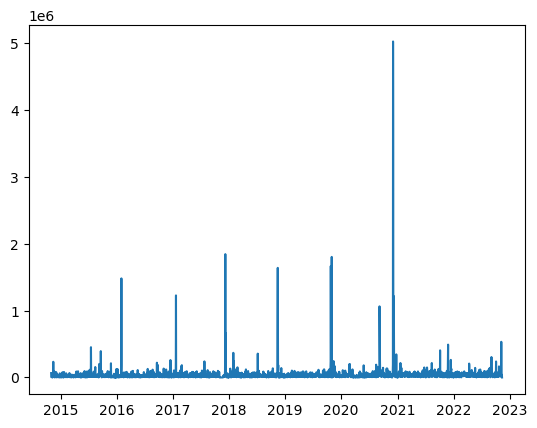

In [70]:
df1['date'] = pd.to_datetime(df1['date'])
plt.plot(df1['date'], df1['hourly_sum'])

In [75]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    df.set_index('date', inplace=True)
    
    for i in range(1, n_steps+1):
        df[f'hourly_sum(t-{i})'] = df['hourly_sum'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(df1, lookback)
shifted_df

,hourly_sum,hourly_sum(t-1),hourly_sum(t-2),hourly_sum(t-3),hourly_sum(t-4),hourly_sum(t-5),hourly_sum(t-6),hourly_sum(t-7)
date,,,,,,,,
2014-11-08,16203.0,10383.0,14965.0,8799.0,7409.0,5513.0,5471.0,65732.0
2014-11-09,648.0,16203.0,10383.0,14965.0,8799.0,7409.0,5513.0,5471.0
2014-11-10,34740.0,648.0,16203.0,10383.0,14965.0,8799.0,7409.0,5513.0
2014-11-11,4249.0,34740.0,648.0,16203.0,10383.0,14965.0,8799.0,7409.0
2014-11-12,11275.0,4249.0,34740.0,648.0,16203.0,10383.0,14965.0,8799.0
...,...,...,...,...,...,...,...,...
2022-11-08,67171.0,533343.0,29964.0,65150.0,70330.0,46224.0,23091.0,20323.0
2022-11-09,21563.0,67171.0,533343.0,29964.0,65150.0,70330.0,46224.0,23091.0
2022-11-10,9669.0,21563.0,67171.0,533343.0,29964.0,65150.0,70330.0,46224.0


In [73]:
df1

,date,hourly_sum
0,2014-11-01,65732.0
1,2014-11-02,5471.0
2,2014-11-03,5513.0
3,2014-11-04,7409.0
4,2014-11-05,8799.0
...,...,...
2902,2022-11-08,67171.0
2903,2022-11-09,21563.0
2904,2022-11-10,9669.0
2905,2022-11-11,33551.0


In [76]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[1.62030e+04, 1.03830e+04, 1.49650e+04, ..., 5.51300e+03,
        5.47100e+03, 6.57320e+04],
       [6.48000e+02, 1.62030e+04, 1.03830e+04, ..., 7.40900e+03,
        5.51300e+03, 5.47100e+03],
       [3.47400e+04, 6.48000e+02, 1.62030e+04, ..., 8.79900e+03,
        7.40900e+03, 5.51300e+03],
       ...,
       [9.66900e+03, 2.15630e+04, 6.71710e+04, ..., 6.51500e+04,
        7.03300e+04, 4.62240e+04],
       [3.35510e+04, 9.66900e+03, 2.15630e+04, ..., 2.99640e+04,
        6.51500e+04, 7.03300e+04],
       [4.83000e+02, 3.35510e+04, 9.66900e+03, ..., 5.33343e+05,
        2.99640e+04, 6.51500e+04]])

In [77]:
shifted_df_as_np.shape

(2900, 8)

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99355003, -0.99586681, -0.99404284, ..., -0.99780543,
        -0.99782215, -0.9738339 ],
       [-0.99974205, -0.99355003, -0.99586681, ..., -0.99705068,
        -0.99780543, -0.99782215],
       [-0.98617096, -0.99974205, -0.99355003, ..., -0.99649736,
        -0.99705068, -0.99780543],
       ...,
       [-0.99615104, -0.99141636, -0.97326107, ..., -0.97406557,
        -0.97200356, -0.9815995 ],
       [-0.98664427, -0.99615104, -0.99141636, ..., -0.98807215,
        -0.97406557, -0.97200356],
       [-0.99980773, -0.98664427, -0.99615104, ..., -0.7876908 ,
        -0.98807215, -0.97406557]])

In [79]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((2900, 7), (2900,))

In [80]:
X = dc(np.flip(X, axis=1))
X

array([[-0.9738339 , -0.99782215, -0.99780543, ..., -0.99649736,
        -0.99404284, -0.99586681],
       [-0.99782215, -0.99780543, -0.99705068, ..., -0.99404284,
        -0.99586681, -0.99355003],
       [-0.99780543, -0.99705068, -0.99649736, ..., -0.99586681,
        -0.99355003, -0.99974205],
       ...,
       [-0.9815995 , -0.97200356, -0.97406557, ..., -0.7876908 ,
        -0.97326107, -0.99141636],
       [-0.97200356, -0.97406557, -0.98807215, ..., -0.97326107,
        -0.99141636, -0.99615104],
       [-0.97406557, -0.98807215, -0.7876908 , ..., -0.99141636,
        -0.99615104, -0.98664427]])

In [81]:
split_index = int(len(X) * 0.95)

split_index

2755

In [82]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2755, 7), (145, 7), (2755,), (145,))

In [83]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2755, 7, 1), (145, 7, 1), (2755, 1), (145, 1))

In [84]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([2755, 7, 1]),
 torch.Size([145, 7, 1]),
 torch.Size([2755, 1]),
 torch.Size([145, 1]))

In [85]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [86]:
train_dataset

In [87]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [88]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

NameError: name 'device' is not defined

In [89]:
import torch

# Check if a GPU is available, and if so, use it; otherwise, use the CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming your train_loader is already defined, you can now use the device as follows:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [90]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [91]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [92]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [93]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 1.312

Val Loss: 0.161
***************************************************

Epoch: 2
Batch 100, Loss: 0.063

Val Loss: 0.001
***************************************************

Epoch: 3
Batch 100, Loss: 0.006

Val Loss: 0.001
***************************************************

Epoch: 4
Batch 100, Loss: 0.003

Val Loss: 0.001
***************************************************

Epoch: 5
Batch 100, Loss: 0.006

Val Loss: 0.001
***************************************************

Epoch: 6
Batch 100, Loss: 0.001

Val Loss: 0.001
***************************************************

Epoch: 7
Batch 100, Loss: 0.003

Val Loss: 0.001
***************************************************

Epoch: 8
Batch 100, Loss: 0.006

Val Loss: 0.001
***************************************************

Epoch: 9
Batch 100, Loss: 0.004

Val Loss: 0.001
***************************************************

Epoch: 10
Batch 100, Loss: 0.004

Val Loss: 0.001
********************************

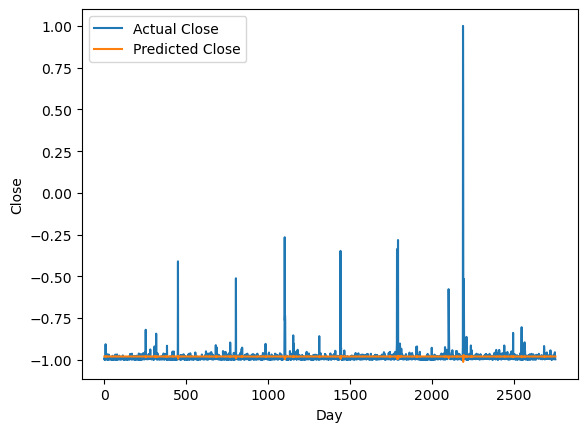

In [94]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [95]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([50538.97287458, 50359.29312319, 50759.9789688 , ...,
       48039.02860016, 50228.72583717, 50511.72144562])

In [96]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([16203.07078153,   648.04497004, 34740.03180057, ...,
       31411.01520658, 16442.04485089,  7863.98378611])

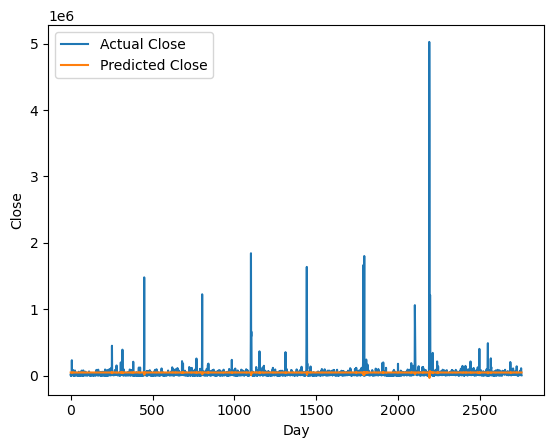

In [97]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [98]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([50660.25670677, 49222.51922935, 49063.20318311, 48034.83607262,
       49285.70660859, 50229.92370218, 50770.16082138, 50086.77883357,
       49064.99998063, 50450.33086389, 48906.2828669 , 50576.40615612,
       50578.50241989, 50720.44942349, 50682.7166757 , 50102.65054494,
       49736.40331835, 49240.48720449, 50627.01595277, 50244.8970148 ,
       50689.90386575, 50509.62518185, 49708.85242313, 49481.25807136,
       49785.51578373, 49056.61492556, 49471.07621878, 50549.15472716,
       48671.50132507, 48675.99331886, 50197.28188068, 50673.13375562,
       48506.19595379, 50251.48527235, 50856.1076358 , 49260.85090965,
       49013.79125148, 49632.78799504, 49873.55886191, 48829.02057379,
       50647.37965792, 50078.3937785 , 50356.59792691, 50461.71058148,
       49888.83164078, 50275.14310628, 50293.71001393, 49619.01254743,
       50823.46581429, 48372.63400525, 49762.75634855, 49811.26988143,
       50385.04722089, 50645.58286041, 49520.78761667, 49889.73003954,
      

In [99]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([6.45159613e+04, 7.52810244e+04, 1.18967012e+05, 7.08600041e+04,
       3.11560197e+04, 6.71493178e+03, 3.21420123e+04, 7.40470737e+04,
       2.16539555e+04, 7.93209739e+04, 1.46829801e+04, 1.12919740e+04,
       4.83293611e+03, 5.45702378e+03, 2.75239433e+04, 4.37719340e+04,
       6.40809865e+04, 1.07430523e+04, 2.30900459e+04, 5.45298099e+03,
       1.19130670e+04, 4.40760419e+04, 5.51980688e+04, 4.38150571e+04,
       7.30859367e+04, 5.85750000e+04, 1.59030056e+04, 8.87749737e+04,
       9.29119502e+04, 3.38570556e+04, 1.15240603e+04, 9.48689622e+04,
       2.98400152e+04, 3.99502954e+03, 6.39119378e+04, 7.58780103e+04,
       5.35909832e+04, 4.38420091e+04, 8.34660360e+04, 1.35279387e+04,
       3.33530539e+04, 2.18289935e+04, 1.61710279e+04, 3.82389955e+04,
       2.39249578e+04, 2.14440297e+04, 4.83010616e+04, 1.78407020e+03,
       9.75550248e+04, 4.79159480e+04, 4.45760009e+04, 2.10789803e+04,
       9.01198766e+03, 5.24389365e+04, 4.12020643e+04, 4.31050226e+04,
      

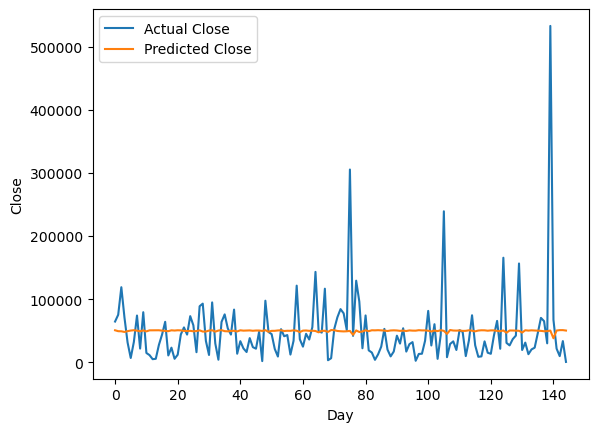

In [100]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [101]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [102]:
#darts

In [103]:
df1

,date,hourly_sum
0,2014-11-01,65732.0
1,2014-11-02,5471.0
2,2014-11-03,5513.0
3,2014-11-04,7409.0
4,2014-11-05,8799.0
...,...,...
2902,2022-11-08,67171.0
2903,2022-11-09,21563.0
2904,2022-11-10,9669.0
2905,2022-11-11,33551.0


In [104]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20,15)

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\4173309574.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [107]:
# Convert the "run_start_time" column to a datetime type
df1['date'] = pd.to_datetime(df1['date'])
                             # Set the run_start_time column as the DataFrame index
df1.set_index('date', inplace=True)

In [108]:
df1

,hourly_sum
date,
2014-11-01,65732.0
2014-11-02,5471.0
2014-11-03,5513.0
2014-11-04,7409.0
2014-11-05,8799.0
...,...
2022-11-08,67171.0
2022-11-09,21563.0
2022-11-10,9669.0


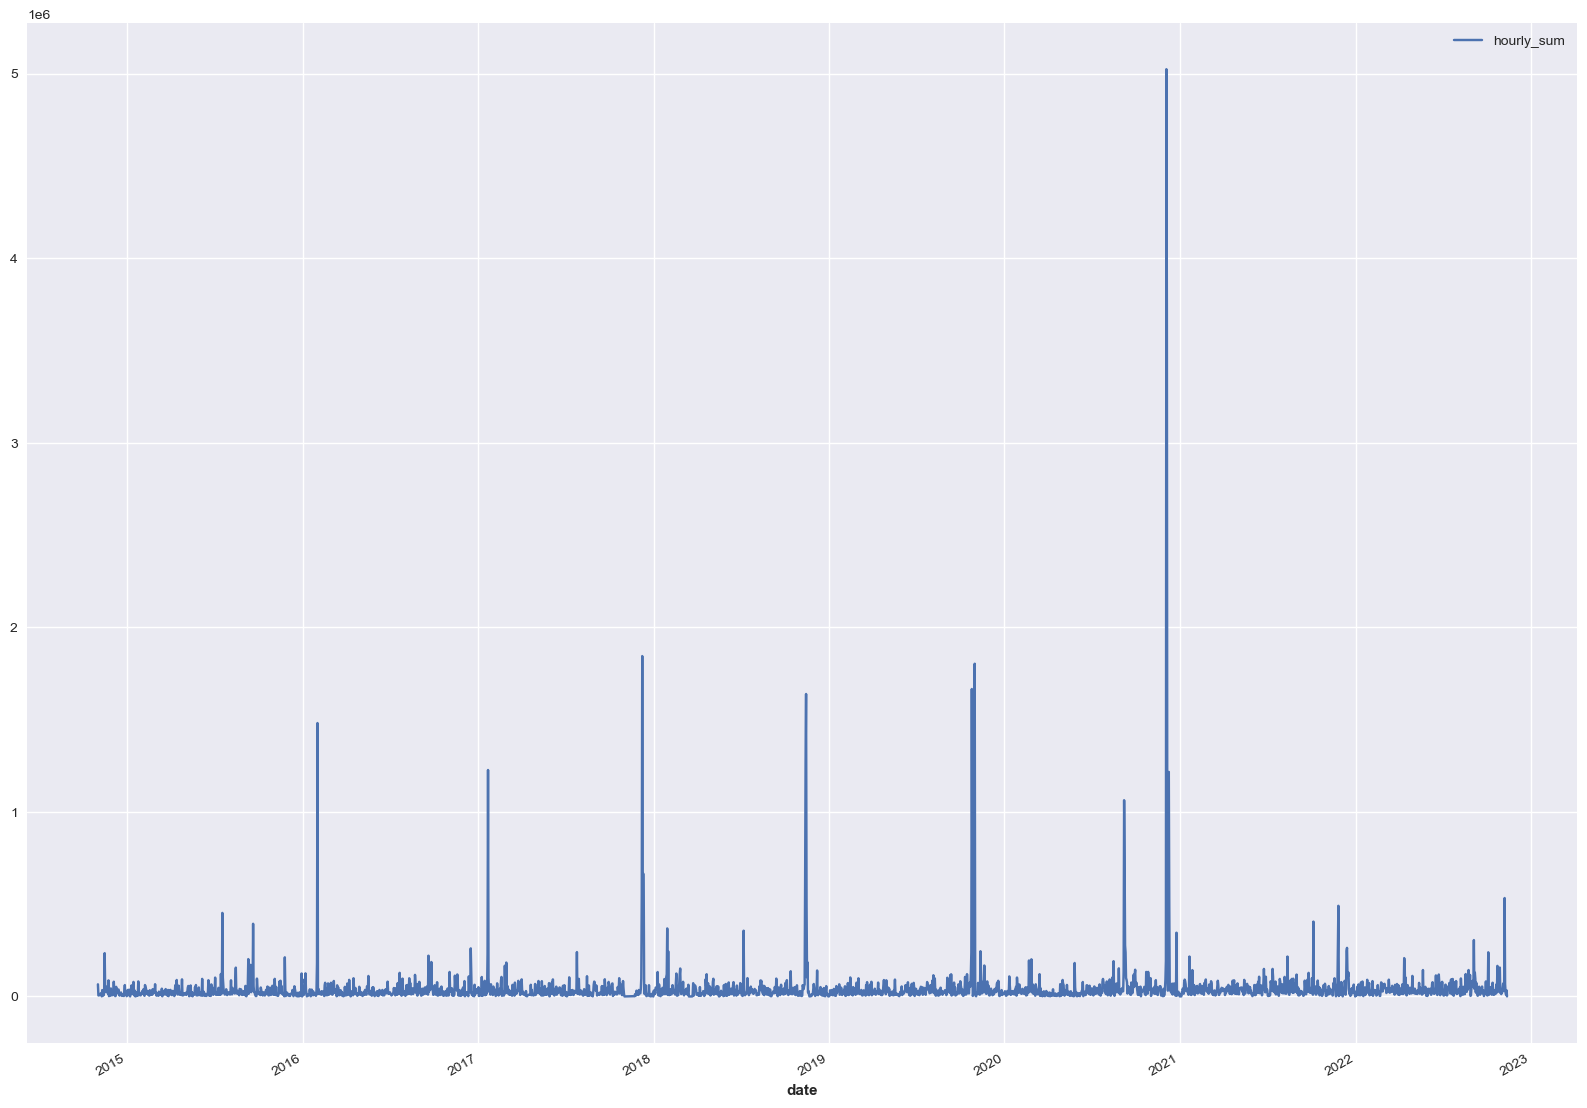

In [109]:
series_power = df1

series_power.plot(label='Number of outages')

plt.legend()

In [112]:
df1

,hourly_sum
date,
2014-11-01,65732.0
2014-11-02,5471.0
2014-11-03,5513.0
2014-11-04,7409.0
2014-11-05,8799.0
...,...
2022-11-08,67171.0
2022-11-09,21563.0
2022-11-10,9669.0


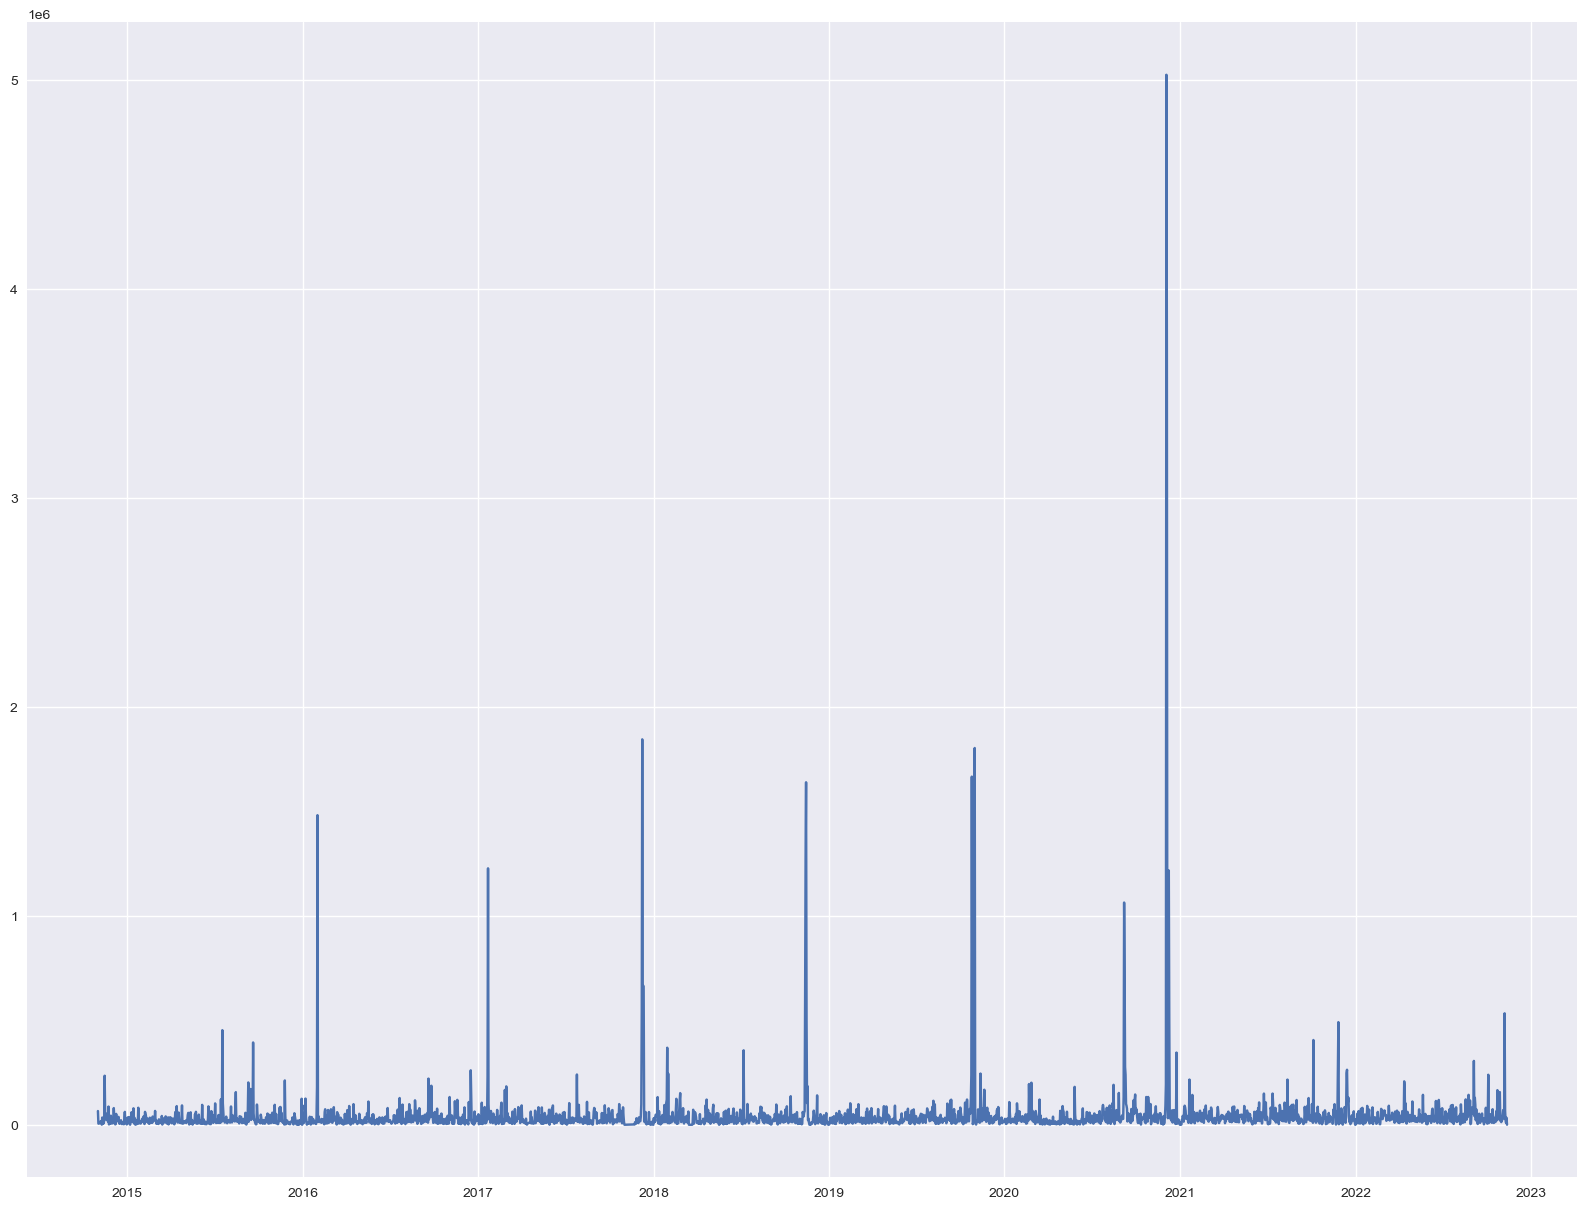

In [114]:
import matplotlib.pyplot as plt

plt.plot(df1.index, df1['hourly_sum'])

In [120]:
import numpy as np
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [125]:
import numpy as np

def df1_to_windowed_df1(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df1_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df1_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df1_subset['hourly_sum'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df1 = pd.DataFrame({})
  ret_df1['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df1[f'Target-{n-i}'] = X[:, i]
  
  ret_df1['Target'] = Y

  return ret_df1

# Start day second time around: '2021-03-25'
windowed_df1 = df1_to_windowed_df1(df1, 
                                '2021-11-25', 
                                '2022-12-23', 
                                n=3)
windowed_df1

KeyboardInterrupt: 

In [127]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
import xgboost as xgb
import os
import warnings
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt


In [128]:

res = sm.tsa.seasonal_decompose(df1['hourly_sum'], model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

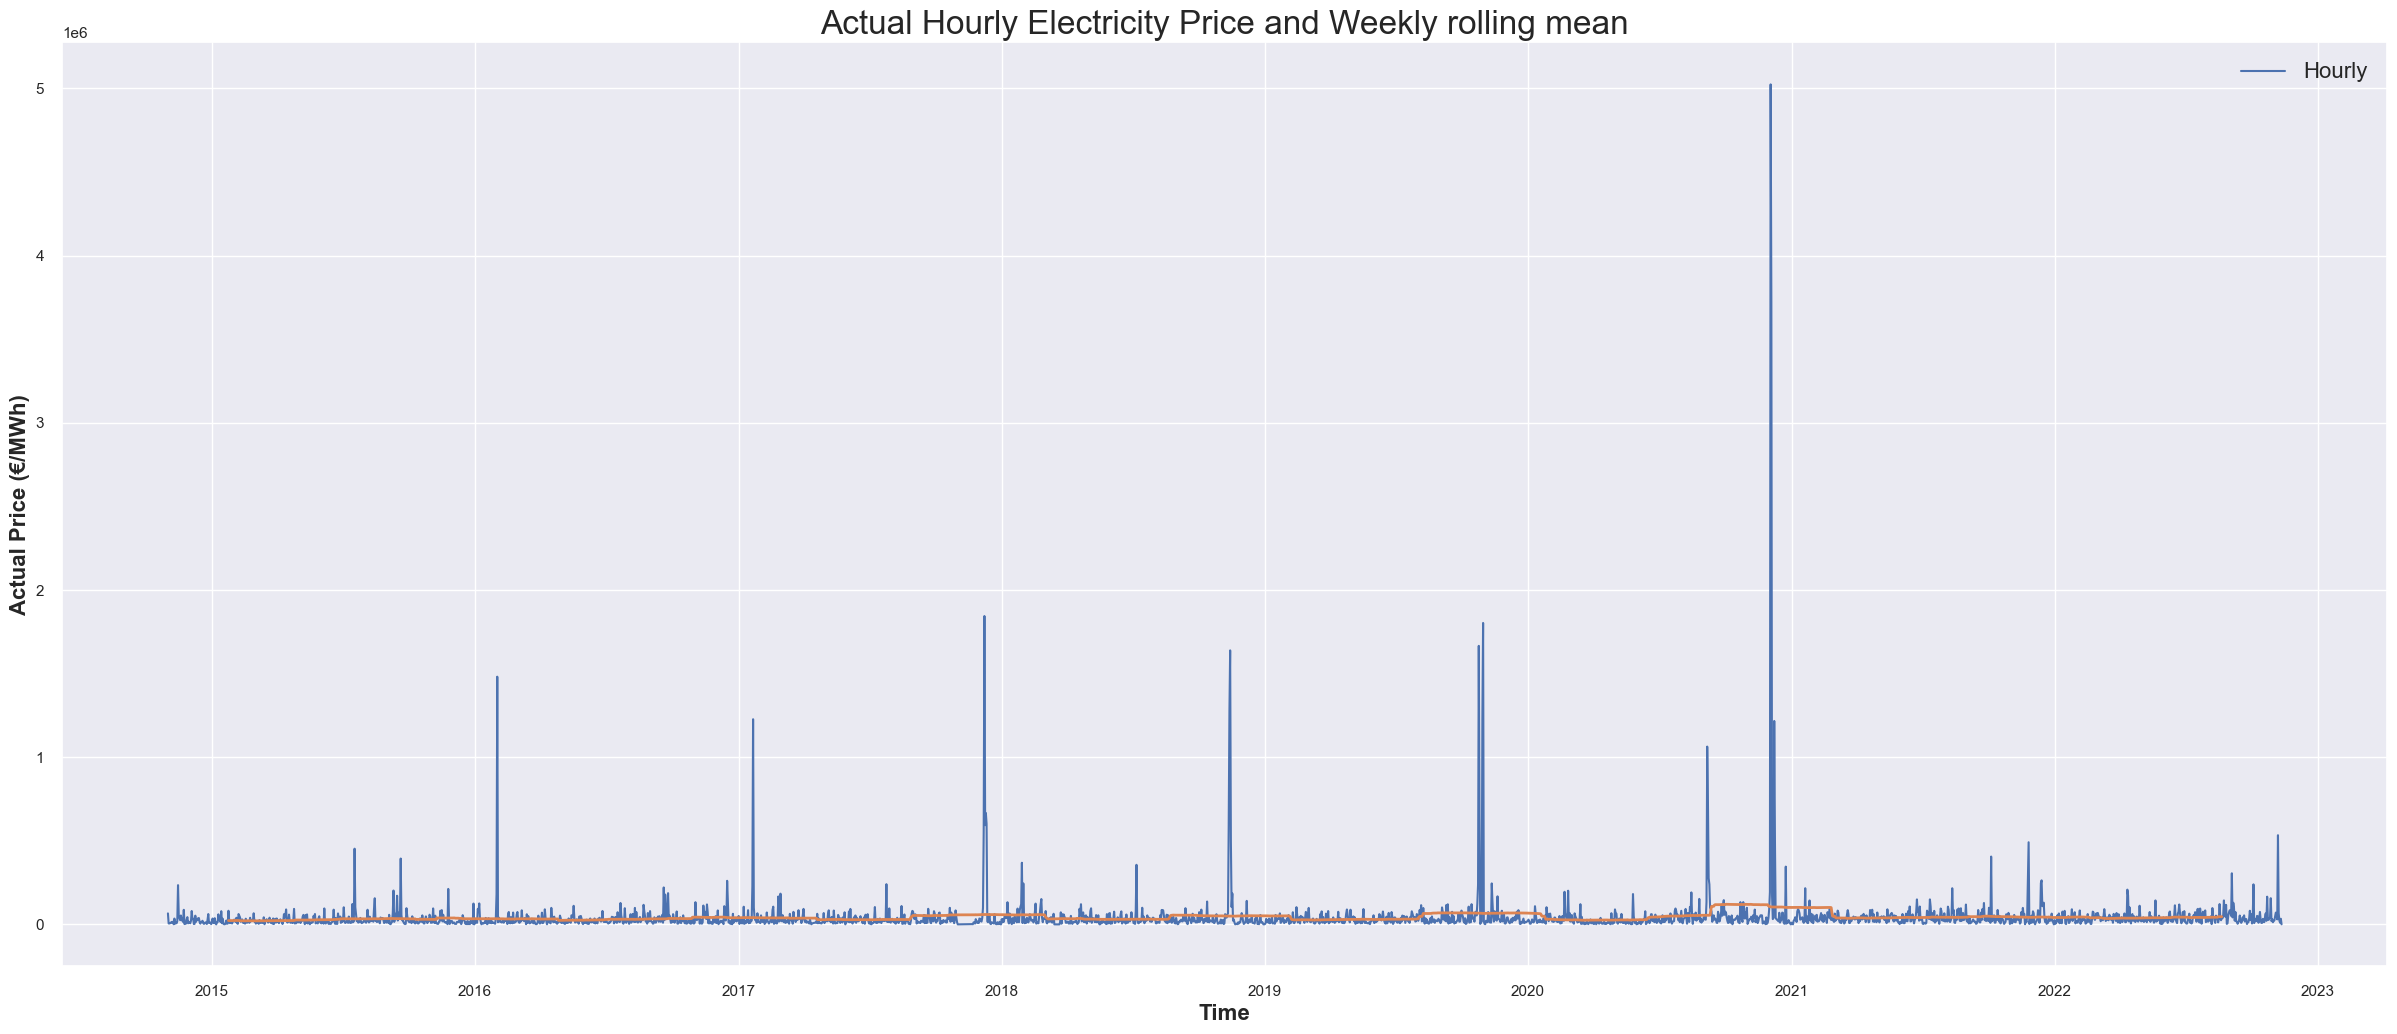

In [133]:
%matplotlib inline
rolling = df1['hourly_sum'].rolling(24*7, center=True).mean()
ax = plot_series(df1, 'hourly_sum', label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Actual Hourly Electricity Price and Weekly rolling mean')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

In [132]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

C:\Users\halee\AppData\Local\Temp\ipykernel_27864\1224047559.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_series(df=None, column=None, series=pd.Series([]),


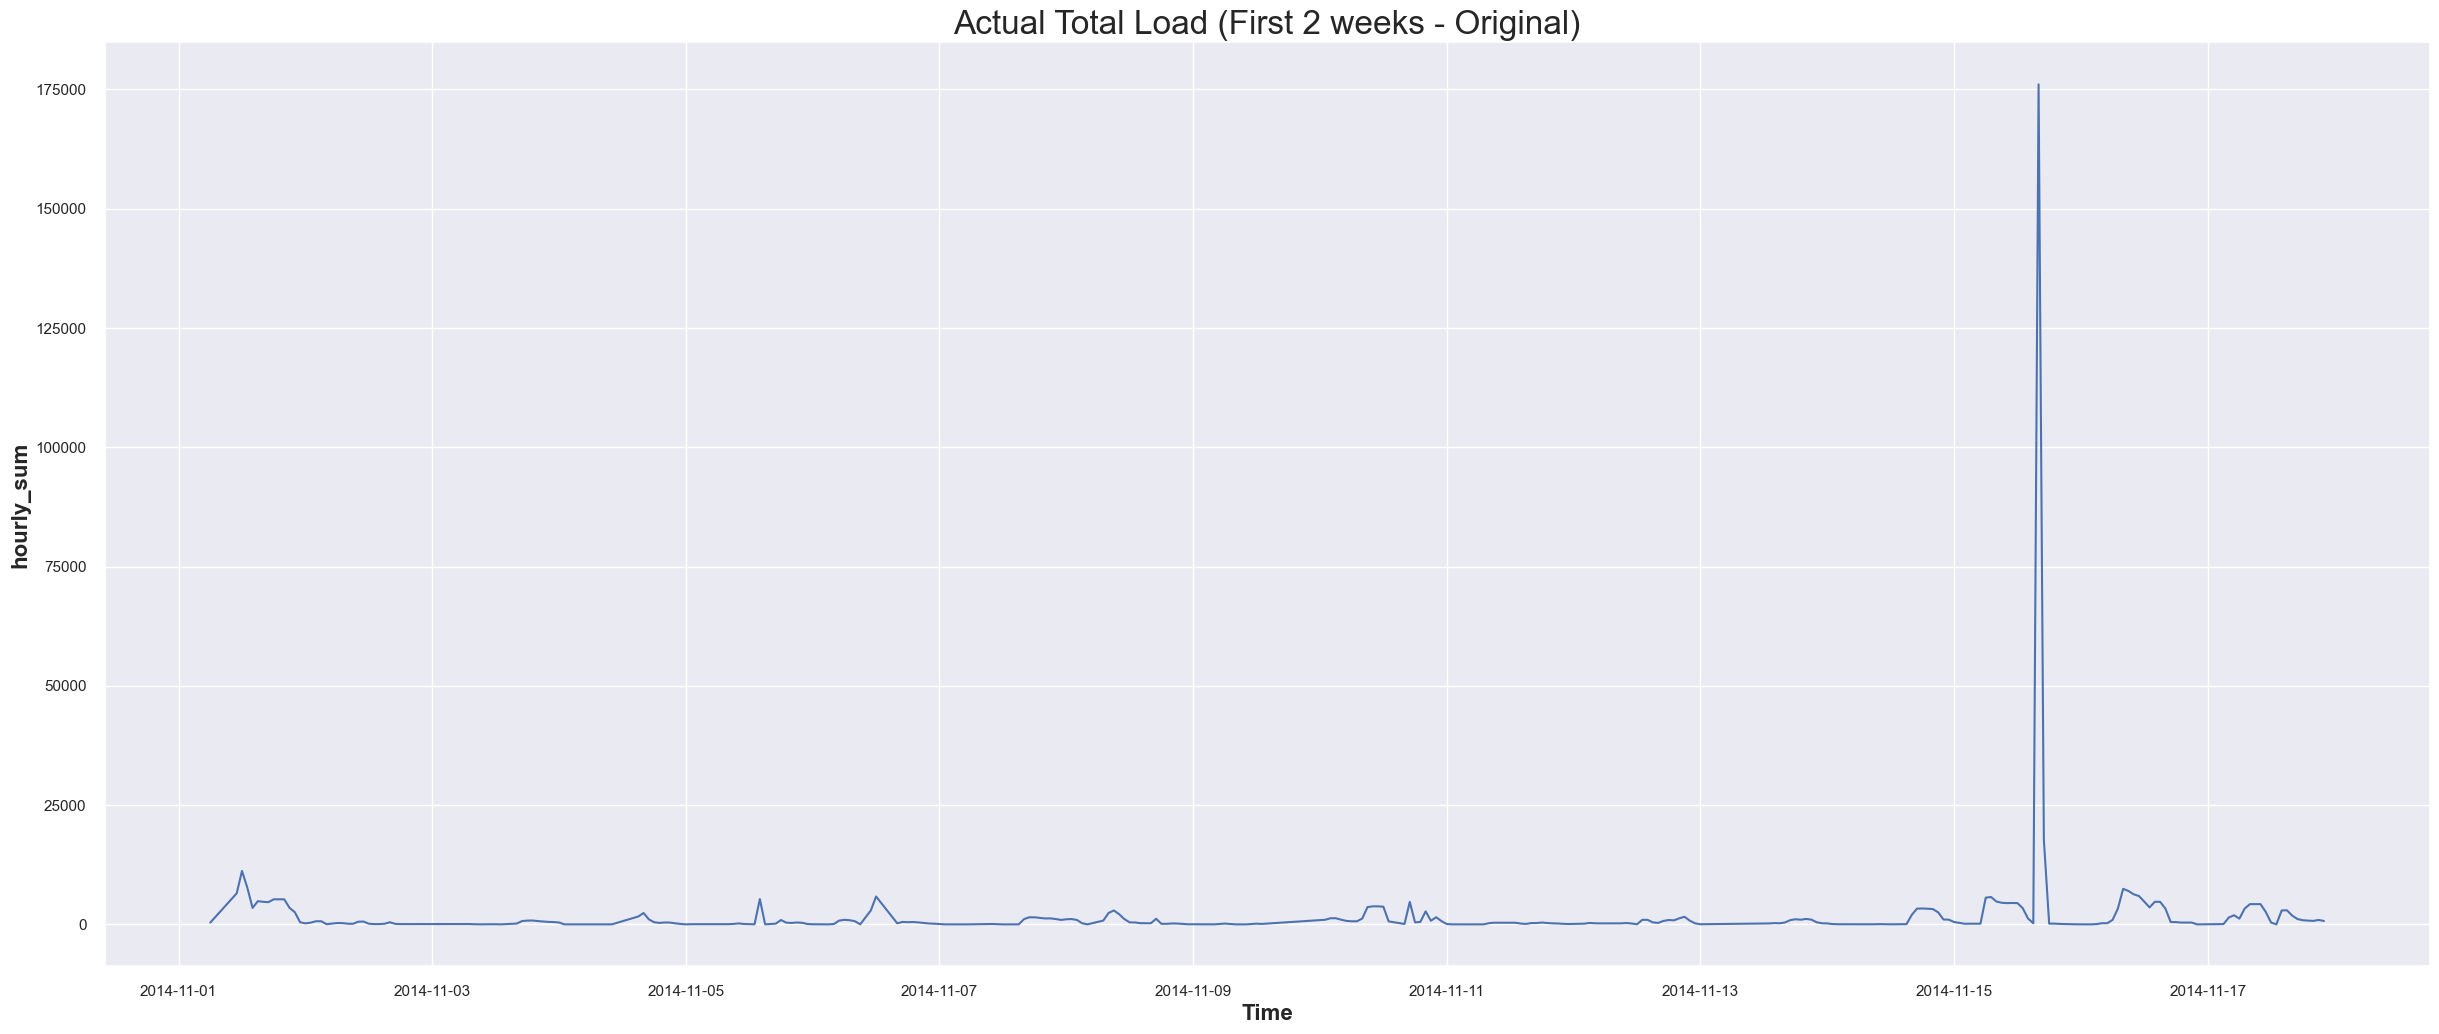

In [149]:
# Zoom into the plot of the hourly (actual) total load

ax = plot_series(df=df3, column='hourly_sum',ylabel='hourly_sum',
                 title='Actual Total Load (First 2 weeks - Original)', end=24*7*2)
plt.show()


In [150]:
# Display the rows with null values

df3[df3.isnull().any(axis=1)].tail()

,hourly_sum
run_start_time,


In [151]:
print('Non-zero values in each column:\n', df3.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

hourly_sum    63511
dtype: int64


In [152]:
X = df3[df3.columns.drop('hourly_sum')].values
y = df3['hourly_sum'].values

y = y.reshape(-1, 1)

In [153]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [154]:
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

NameError: name 'train_end_idx' is not defined